In [20]:
import numpy as np, pandas as pd, tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
# 1. 데이터 로드
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML programming/data/Alcohol_Sales.csv')
data = df['S4248SM144NCEN'].values.reshape(-1,1)

In [11]:
# 2. 정규화
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [16]:
# 3. 시퀀스 생성
window = 12   # 최근 12개월 → 다음달 예측
X, y = [], []
for i in range(len(data)-window):
    X.append(data[i:i+window])
    y.append(data[i+window])
X, y = np.array(X), np.array(y)
X.shape, y.shape

((313, 12, 1), (313, 1))

In [17]:
rnn = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(64, return_sequences=True, input_shape=(window,1)),
    tf.keras.layers.SimpleRNN(32),
    tf.keras.layers.Dense(1)
])
rnn.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)        │ (None, 12, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# 4. LSTM 모델
lstm = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, input_shape=(window, 1)),
    tf.keras.layers.LSTM(32),
    tf.keras.layers.Dense(1)
])
lstm.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 12, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

print(f"Train data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Train data shape: (250, 12, 1)
Test data shape: (63, 12, 1)


In [34]:
# RNN 훈련
rnn.compile(loss='mse', optimizer='adam')

print("\n--- 모델 훈련 시작 ---")
history = rnn.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32
)
print("--- 모델 훈련 완료 ---")


--- 모델 훈련 시작 ---
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 210ms/step - loss: 0.0077
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0030
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0027 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 9.8041e-04
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2126e-04 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 6.9896e-04 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.3909e-04 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.5311e-04 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 7.1552e-04 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6.8140e-04 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.4237e-04 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.1124e-04 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 493ms/step
[Scikit-learn] 테스트 세트 MSE: 0.003162


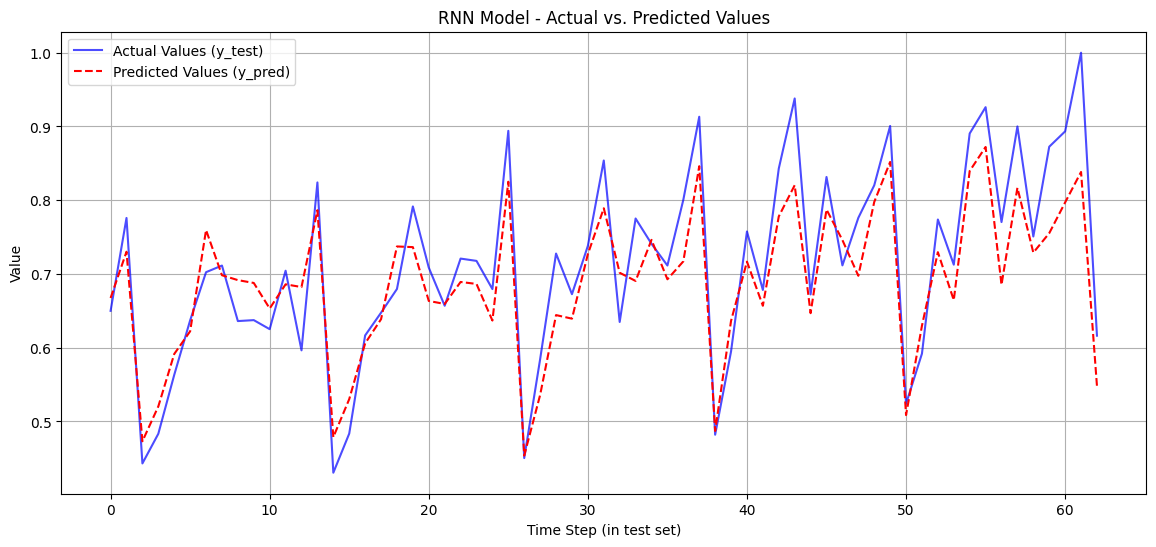

In [35]:
#RNN 평가
y_pred = rnn.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred.flatten())
print(f"[Scikit-learn] 테스트 세트 MSE: {mse_sklearn:.6f}")


# 8. 실제 값 vs 예측 값 비교 그래프
plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values (y_test)', color='blue', alpha=0.7)
plt.plot(y_pred.flatten(), label='Predicted Values (y_pred)', color='red', linestyle='--')
plt.title('RNN Model - Actual vs. Predicted Values')
plt.xlabel('Time Step (in test set)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [42]:
#LSTM 훈련
lstm.compile(loss='mse', optimizer='adam')

print("\n--- LSTM 모델 훈련 시작 ---")
history = lstm.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32
)
print("--- LSTM 모델 훈련 완료 ---")


--- LSTM 모델 훈련 시작 ---
Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0796
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0076
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0083 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0063 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0057 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0048 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0045 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0048 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0044 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0049 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0046 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0039 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0042 
Epoch 16/50


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
[Scikit-learn] 테스트 세트 MSE: 0.012441


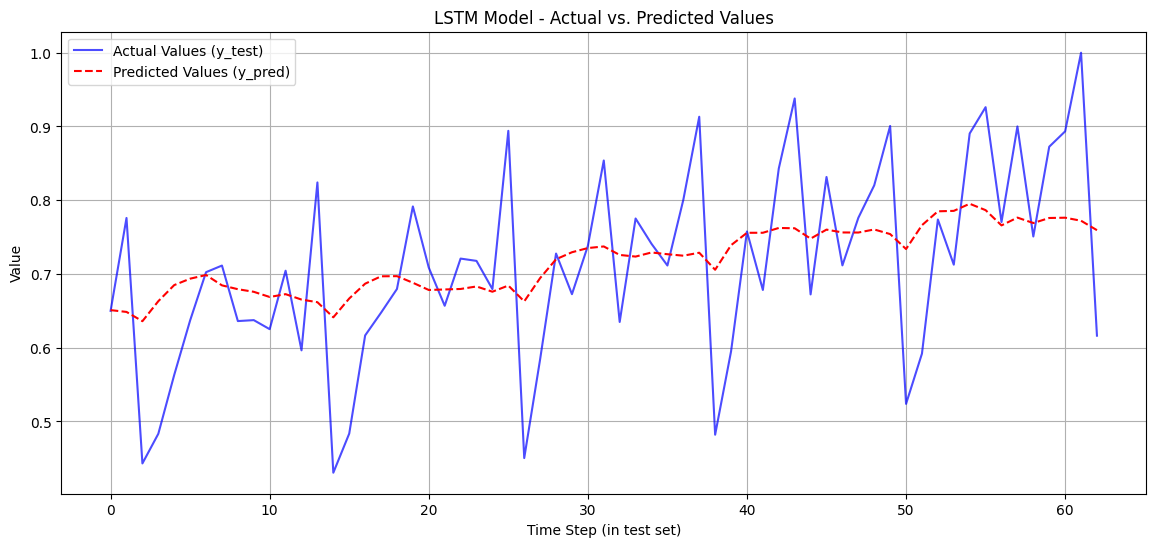

In [43]:
#LSTM 테스트
y_pred = lstm.predict(X_test)

mse_sklearn = mean_squared_error(y_test, y_pred.flatten())
print(f"[Scikit-learn] 테스트 세트 MSE: {mse_sklearn:.6f}")

plt.figure(figsize=(14, 6))
plt.plot(y_test, label='Actual Values (y_test)', color='blue', alpha=0.7)
plt.plot(y_pred.flatten(), label='Predicted Values (y_pred)', color='red', linestyle='--')
plt.title('LSTM Model - Actual vs. Predicted Values') # 제목 변경
plt.xlabel('Time Step (in test set)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()